In [4]:
import numpy as np
from models.models import L1Model, LInfModel
from models.DataGenerator import DataGenerator

# Demonstration of the $L^1$ and $L^{\infty}$ data fitting model

## 2D data

Loading data

In [5]:
data = np.load('data/A04plotregres.npz')
x, y = np.array([data['x']]), data['y']
print(f'Dependent vector: {y}')
print(f'Independent vector: {x}')

Dependent vector: [139.  172.   76.5 120.   86.  215.  122.   67.   86.  250.  164.8 115.
 134.5 175.  135.  105. ]
Independent vector: [[ 84  81  38  80  45 100  74  36  51 118  82  78  69  74  64  67]]


Construct instances of `L1Model` and `LInfModel` with loaded data

In [6]:
model1 = L1Model(y, x)
model2 = LInfModel(y, x)

Solve for optimal $\beta$ coefficients

In [7]:
beta1 = model1.solve()
beta2 = model2.solve()
print(f'Beta values of {model1.model_type}: {beta1}')
print(f'Beta values of {model2.model_type}: {beta2}')

Beta values of Manhattan norm: [-9.83783785  2.12972972]
Beta values of Chebysev's norm: [15.45454486  1.70454546]


Calculate $R^2$ coefficient and visualize regression line for `L1Model`

R quadratic value: 0.8158391485184356


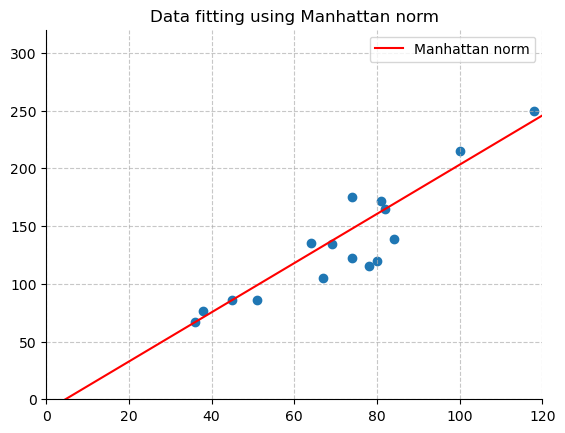

True

In [8]:
print(f'R quadratic value: {model1.r2()}')
model1.visualize()

Calculate $R^2$ coefficient and visualize regression line for `LInfModel`

R quadratic value: 0.8016361210317742


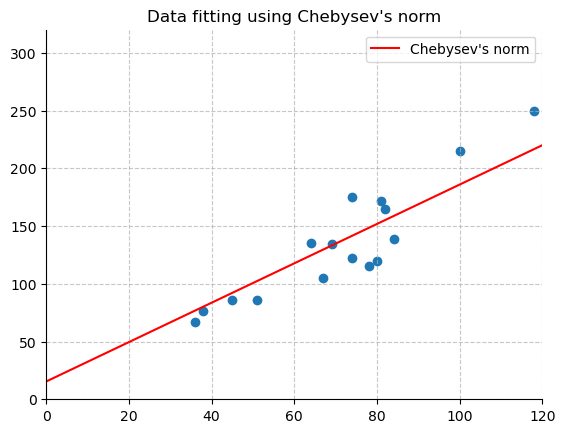

True

In [9]:
print(f'R quadratic value: {model2.r2()}')
model2.visualize()

## 3D data

Generate arbitrary 3D data

In [10]:
def data_3d(start=10, finish=200, size=20, noise=(100, 500)):
    generator = DataGenerator()
    return generator.gen_3d_data(start=start, finish=finish, size=size, noise=noise)

In [11]:
data = data_3d()
y = data[2]
x = np.array([data[0], data[1]])
print(f'Dependent vector:\n {y}')
print(f'Matrix of independent vector:')
x.view()

Dependent vector:
 [ -990  -611 -1477 -1585 -2166  -699  -809  -632 -1246 -1018 -1201  -984
 -1779 -1342 -1444  -536 -1232  -777  -684 -1096]
Matrix of independent vector:


array([[106,  73, 134, 137, 180,  51, 139,  46,  72,  60, 107, 124, 194,
        143, 176,  36, 172,  72, 130, 183],
       [ 97,  55, 165, 152, 175, 124,  29, 146, 186, 143, 120,  97,  66,
        103,  49, 102,  51,  78,  12,  16]])

The procedure follows as before

In [12]:
model1 = L1Model(y, x)
model2 = LInfModel(y, x)

In [13]:
beta1 = model1.solve()
beta2 = model2.solve()
print(f'Beta values of {model1.model_type}: {beta1}')
print(f'Beta values of {model2.model_type}: {beta2}')

Beta values of Manhattan norm: [472.78554136  -8.34278956  -6.01857479]
Beta values of Chebysev's norm: [441.22245057  -8.73645004  -5.32057539]


R quadratic value: 0.9284133273413545


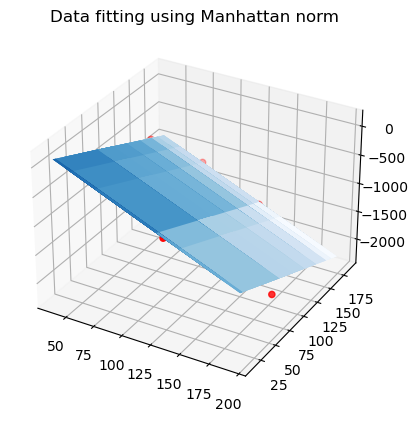

True

In [14]:
print(f'R quadratic value: {model1.r2()}')
model1.visualize()

R quadratic value: 0.9263847493217419


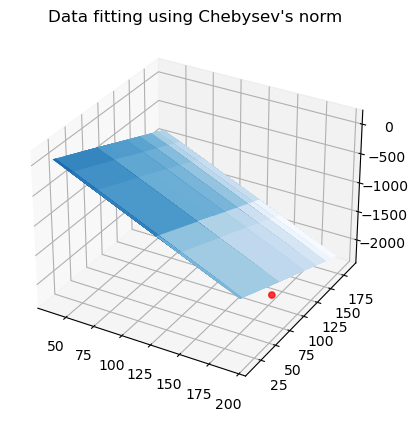

True

In [15]:
print(f'R quadratic value: {model2.r2()}')
model2.visualize()